In [2]:
import pandas as pd
import matplotlib import pyplot as py

df = pd.read_csv('../../data/beauty.csv',sep=';')

df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [5]:
df['wage'].max()

77.72

In [6]:
df['wage'].describe()

count    1260.000000
mean        6.306690
std         4.660639
min         1.020000
25%         3.707500
50%         5.300000
75%         7.695000
max        77.720000
Name: wage, dtype: float64

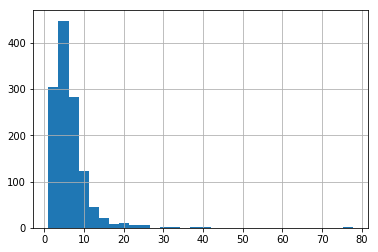

In [8]:
df['wage'].hist(bins=30)

In [9]:


df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


In [12]:
stats_df = df.describe()
stats_df.union

count    1260.000000
mean        0.272222
std         0.445280
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: union, dtype: float64

In [13]:
df.iloc[0,5]
# indexing

1

In [14]:
df.iloc[:10,5]

0    1
1    1
2    1
3    0
4    0
5    1
6    0
7    0
8    1
9    1
Name: female, dtype: int64

In [16]:
## loc is for indexing
df.loc[:10,['wage','exper']]

,wage,exper
0,5.73,30
1,4.28,28
2,7.96,35
3,11.57,38
4,11.42,27
5,3.91,20
6,8.76,12
7,7.69,5
8,5.00,5
9,3.89,12


In [21]:
toy_df = pd.DataFrame({'age':[40,45,32], 'salary':[78,45,67]})

In [22]:
toy_df

,age,salary
0,40,78
1,45,45
2,32,67


In [27]:
df[df['wage']>40]  ## . index data earn more than 40

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
269,41.67,16,0,0,0,0,1,0,13,4
602,77.72,9,1,1,1,1,1,1,13,4


In [29]:
df[(df['wage'] >40) & (df['female']==0)]  ## and are female and above 40 age

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
269,41.67,16,0,0,0,0,1,0,13,4


In [31]:
df.loc[df['female']==0, 'married'].mean()  ##are married

0.7985436893203883

In [32]:
df.loc[df['female']==1, 'married'].mean()  

0.48853211009174313

In [33]:
## men married 48% and women 79% out of 1260

df.shape 

(1260, 10)

In [34]:
df.info() ## general info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
wage        1260 non-null float64
exper       1260 non-null int64
union       1260 non-null int64
goodhlth    1260 non-null int64
black       1260 non-null int64
female      1260 non-null int64
married     1260 non-null int64
service     1260 non-null int64
educ        1260 non-null int64
looks       1260 non-null int64
dtypes: float64(1), int64(9)
memory usage: 98.5 KB


In [35]:
## continuous  - numeric
## categorical
## ordinal
## binary 

## different data types



In [36]:
df['wage'].mean(), df['wage'].median() ## numeric

(6.306690476190469, 5.3)

In [37]:
df['looks'].unique()  ## categorialcal

array([4, 3, 2, 5, 1])

In [38]:
df['looks'].value_counts() ## aggregation

3    722
4    364
2    142
5     19
1     13
Name: looks, dtype: int64

In [41]:
df['female'].value_counts(normalize='True')

0    0.653968
1    0.346032
Name: female, dtype: float64

In [42]:
## GroupBy

In [47]:
for (gender, sub_df) in df.groupby('female'):
    print(gender)
    print(sub_df.shape[0]) 

0
824
1
436


In [48]:
for (gender, sub_df) in df.groupby('female'):
    print("Female : %d" % gender)
    print(sub_df['wage'].median()) 

Female : 0
6.41
Female : 1
3.75


In [49]:
df.groupby('female')['wage','looks'].median()

,wage,looks
female,,
0,6.41,3
1,3.75,3


In [51]:
df.groupby(['married','female'])['wage','looks'].median()

wage  looks
married female              
0       0       5.065      3
        1       3.890      3
1       0       6.710      3
        1       3.580      3

In [53]:
pd.crosstab(df['married'],df['female']) ##plots

female,0,1
married,,
0,166,223
1,658,213


In [54]:
### apply , feature engineering

def gender_as_string(gender_id):
    '''
    if geneder_id ==
    '''
    return 'female' if gender_id else 'male'
df['female'].apply()

In [55]:
def gender_as_string(gender_id): 
    ''' if geneder_id == 1''' 
    return 'female' if gender_id else 'male'



In [56]:
df['female'].apply(gender_as_string).head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

In [57]:
df['female'].apply(lambda gender_id : 'female' if gender_id else 'male').head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

In [58]:
df['female'].map({1:'female',0:'male'}).head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

In [59]:
df['wage'].apply(lambda wage : wage/.84).head() ##Dolalr to euro .84 conversion

0     6.821429
1     5.095238
2     9.476190
3    13.773810
4    13.595238
Name: wage, dtype: float64

In [62]:
df['educ'].nunique()

8

In [63]:
df['educ'].value_counts()

12    468
13    246
10    156
17    132
16    121
14     51
8      44
5      42
Name: educ, dtype: int64

In [64]:

import seaborn as sns

sns.set()

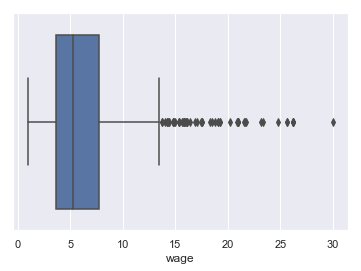

In [66]:
sns.boxplot(x='wage', data =df[df['wage'] < 30])


In [67]:
## inter quartile range  IQR 

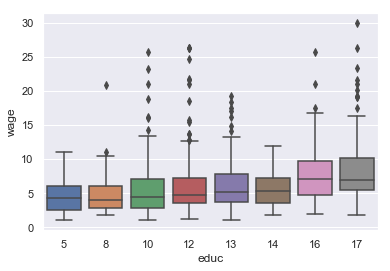

In [68]:
sns.boxplot(x='educ',y='wage', data =df[df['wage'] < 30])

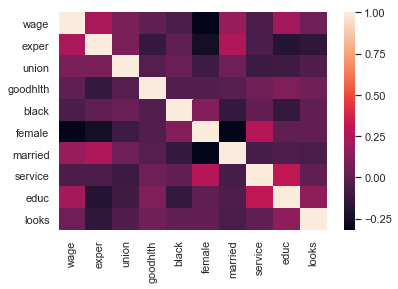

In [69]:
sns.heatmap(df.corr())

In [70]:
df['educ'].corr_with('wage')

AttributeError: 'Series' object has no attribute 'coor_with'

In [72]:
dir(pd.Series) ## to list methods

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 

In [74]:
df.corrwith(df['wage'])

wage        1.000000
exper       0.234632
union       0.094529
goodhlth    0.006756
black      -0.059052
female     -0.313419
married     0.184521
service    -0.053653
educ        0.212333
looks       0.055019
dtype: float64

In [78]:
plt.scatter([df['wage'],df['educ']])

NameError: name 'plt' is not defined